# Data Cleansing 

In [121]:
import numpy as np
import xml.etree.ElementTree as ET
import os.path as osp
import os 
from glob import glob 
import matplotlib.pyplot as plt 
from PIL import Image
import torch 

# %load_ext autoreload
# %autoreload 2 
import sys 
sys.path.append("/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/00.Libs")
import RS_utils

In [122]:
# file_list = sorted(glob("/mnt/hdd/eric/.tmp_ipy/00.Data/HRSC2016/Annotations/*.xml"))

In [123]:
# remove_xml = []
# for file in file_list:
#     xml_path = file
#     tree = ET.parse(xml_path)
#     root = tree.getroot()
    
#     if len(root.findall('object'))==0:
#         print(xml_path)
#         remove_xml.append(xml_path)

In [124]:
# for i in remove_xml:
#     os.remove(i)

In [125]:
len(os.listdir("/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/06.Gits/SAM_RS/Generate Dataset/SAM_results"))

1654

# Mask Visualization

In [126]:
# --- 
sea = True
if sea:
    path      = "/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/06.Gits/SAM_RS/Generate Dataset/all_masks_saved.npy"
    path_name = "/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/06.Gits/SAM_RS/Generate Dataset/all_names_saved.npy"
    
    #path_name = "/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/06.Gits/SAM_RS/Generate Dataset/all_names_saved_h_0418_7_rbox.npy"
    #path      = "/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/06.Gits/SAM_RS/Generate Dataset/all_masks_saved_h_0418_7_rbox.npy"
    #path=       "/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/06.Gits/SAM_RS/Generate Dataset/all_masks_saved_h_0418_5_all_prompts.npy"
    
    #path = "/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/06.Gits/SAM_RS/Generate Dataset/all_masks_saved_h.npy"
    #path_name= "/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/06.Gits/SAM_RS/Generate Dataset/all_names_saved_h.npy"

    names = np.load(path_name, allow_pickle=True)
    masks = np.load(path, allow_pickle=True)

In [127]:
len(names), len(masks)

(1654, 1654)

1290
100001317


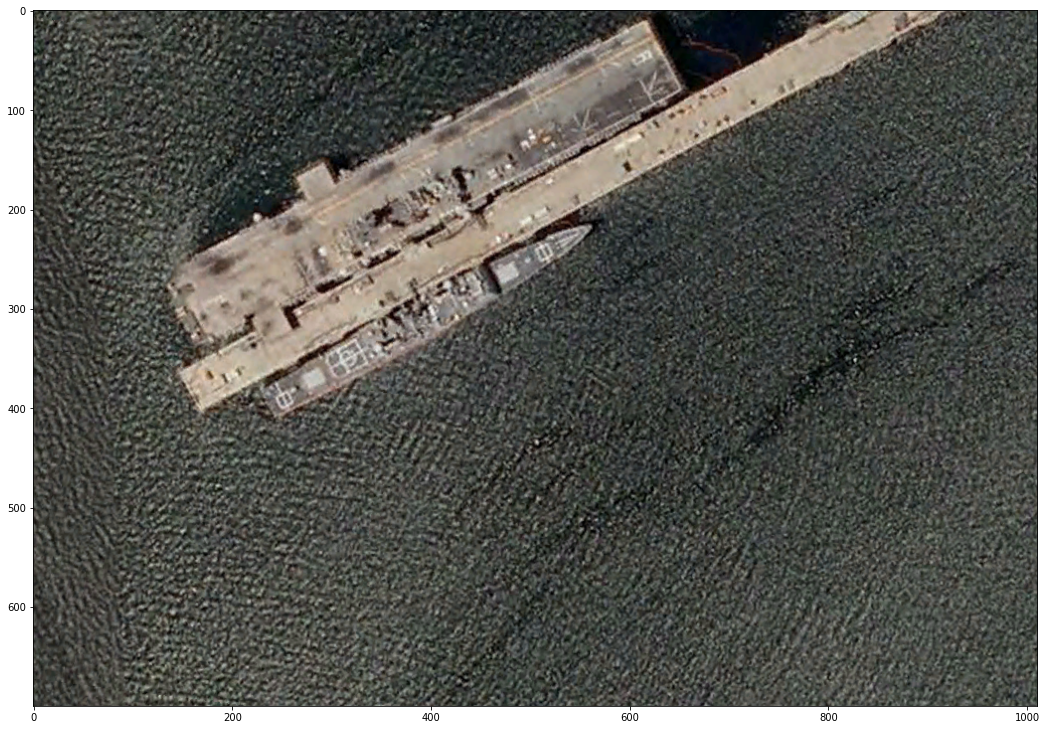

In [128]:
image_root = "/mnt/hdd/eric/.tmp_ipy/00.Data/HRSC2016/AllImages"

idx = np.random.randint(1600)
#idx = 936
print(idx)
print(names[idx])
p = os.path.join( image_root, names[idx] + ".bmp" )

aa = Image.open(p)
plt.figure(figsize=(18,18))
plt.imshow(aa)

In [129]:
sample_mask = masks[idx]
qa = torch.from_numpy(sample_mask)
print(qa.shape)

torch.Size([2, 700, 1011])


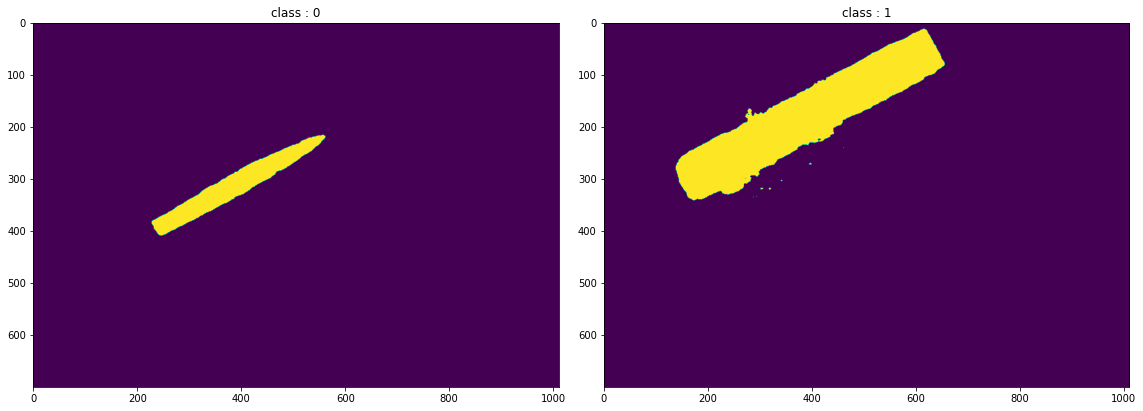

In [130]:
RS_utils.label_display(qa, n_class = sample_mask.shape[0], nrows= int(np.ceil(sample_mask.shape[0] / 2)) , ncols = 2 , channel_order='torch', batch=False)

(0, 255, 0)
(0, 0, 255)


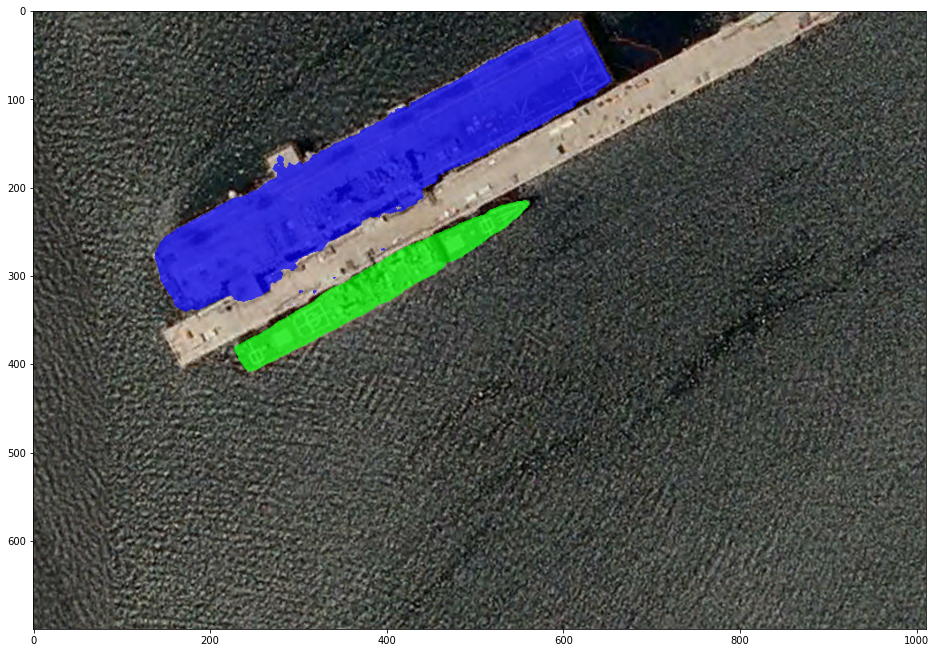

In [131]:
image_root = "/mnt/hdd/eric/.tmp_ipy/00.Data/HRSC2016/AllImages"
p = os.path.join( image_root, names[idx] + ".bmp" )

aa = Image.open(p)
image_ = np.asarray(aa) 
masks_ = np.asarray(qa)


LABELS = [[0], [0]] 
    
COLORS = [
    (255, 0, 0),    # Red
    (0, 255, 0),    # Green
    (0, 0, 255),    # Blue
    (255, 255, 0),  # Yellow
]

segmented_image = RS_utils.draw_masks_fromList(image_, [i for i in masks_], labels = LABELS, colors=COLORS)

plt.figure(figsize=(16,16))
plt.imshow(segmented_image)

In [132]:
#------------------------------------

# Save output results 

#-----------------------------------

save =False

if save:
    image_root = "/mnt/hdd/eric/.tmp_ipy/00.Data/HRSC2016/AllImages"

    for idx in range(len(masks)):
        print(idx)
        p = os.path.join( image_root, names[idx] + ".bmp" )
        aa = Image.open(p)

        sample_mask = masks[idx]
        qa = torch.from_numpy(sample_mask)
        print(qa.shape)

        plt.figure(figsize=(18,18))
        plt.imshow(aa)
        for i in range(qa.shape[0]):
            qw = qa[i,:,:]
            plt.imshow(qw,alpha=0.2)

        plt.savefig(f"/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/06.Gits/SAM_RS/Generate Dataset/SAM_results_v1/{idx}.png")